<a href="https://colab.research.google.com/github/parvvaresh/web-scraper-and-data-analyze/blob/main/data_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installed libraries for **Persian language** processing in Google coalb

In [ ]:
from google.colab import output
!pip install arabic-reshaper
!pip install python-bidi
!pip install hazm
output.clear()

Calling functions to draw **plots** and **read datasets**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from google.colab import drive
import hazm
drive.mount('/content/drive')
output.clear()

Reading the dataset and using important columns and see it

In [ ]:
#read data set
data = pd.read_csv("/content/drive/MyDrive/Ai labs/web scraping/data/Data_nan.csv")
#important columns
data = data[["Title", "Abstract", "Owner", "field", "Key word", "country", "State", "City", "link of page"]]
#see it
data.head(5)

,Title,Abstract,Owner,field,Key word,country,State,City,link of page
0,خشک شدن سریع، افزایش مقاومت به سایش و ماندگاری...,خشک شدن سریع رنگ بر روی کیسه و افزایش چسبندگی ...,پژوهشگران فناوریهای پیشرفته آسیا,"علوم پایه, مهندسی محیط زیست",NaN,ایران,اصفهان,NaN,https://nan.ac/ViewNeed/AF159FCAAA904963F36E6C...
1,امکان سنجی، توسعه و بومی سازی روش های اندازه گ...,سیلاب هر ساله خسارات زیادی به بخشهای مختلف است...,شرکت سهامی آب منطقه ای قزوین,NaN,['امکان سنجی-توسعه-بومی سازی-اندازه گیری-بارش ...,ایران,قزوین,قزوین,https://nan.ac/ViewNeed/A0B2F6EC69775DE8437499...
2,طراحی و ساخت سمپاش هایی با قدرت تشخیص علف هرز ...,بهترین روش برای حفاظت از مزارع کشاورزی، پیشگیر...,پارک علم و فناوری همدان,NaN,['سمپاش هوشمند، علف هرز، گیاه زراعی'],ایران,همدان,همدان,https://nan.ac/ViewNeed/985034DAC2683BA0C42283...
3,کاهش میزان افت در فرایند تولید،توزیع، انبار و...,کاهش میزان افت در فرایند تولید،توزیع، انبار و...,پارک علم و فناوری فارس,"دامپزشکی, فنی و مهندسی, کشاورزی و منابع طبیعی",['کاهش افت تولید توزیع انبار کشتارگاه سالیذ'],ایران,فارس,شیراز,https://nan.ac/ViewNeed/997C982AF525D5F3980D47...
4,اکسترودر دوماردونه با قابلیت تخمیر و پخت همزما...,در حال حاضر نمونه دستگاه اکسترودر دو ماردون جه...,NaN,"کشاورزی و منابع طبیعی, علوم بهداشت",NaN,ایران,قم,NaN,https://nan.ac/ViewNeed/64317CAC21FF7F75E61BDD...


Check how many nulls each column has

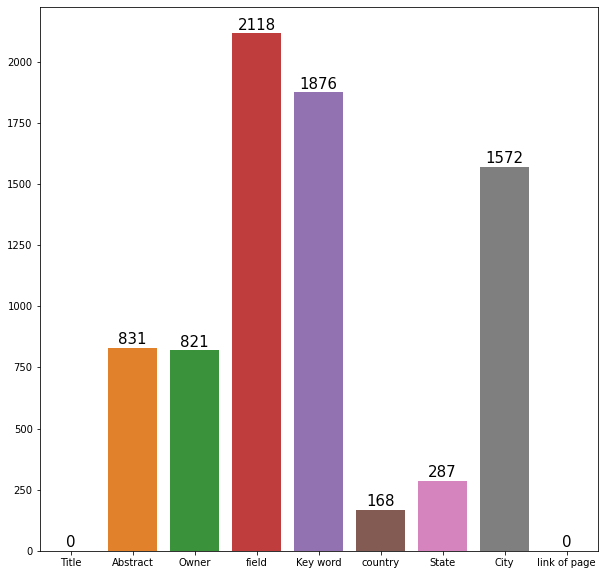

In [ ]:
null_value = dict(data.isnull().sum())
plt.figure(figsize = (10,10))
plots = sns.barplot(x = list(null_value.keys()), y = list(null_value.values()))

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

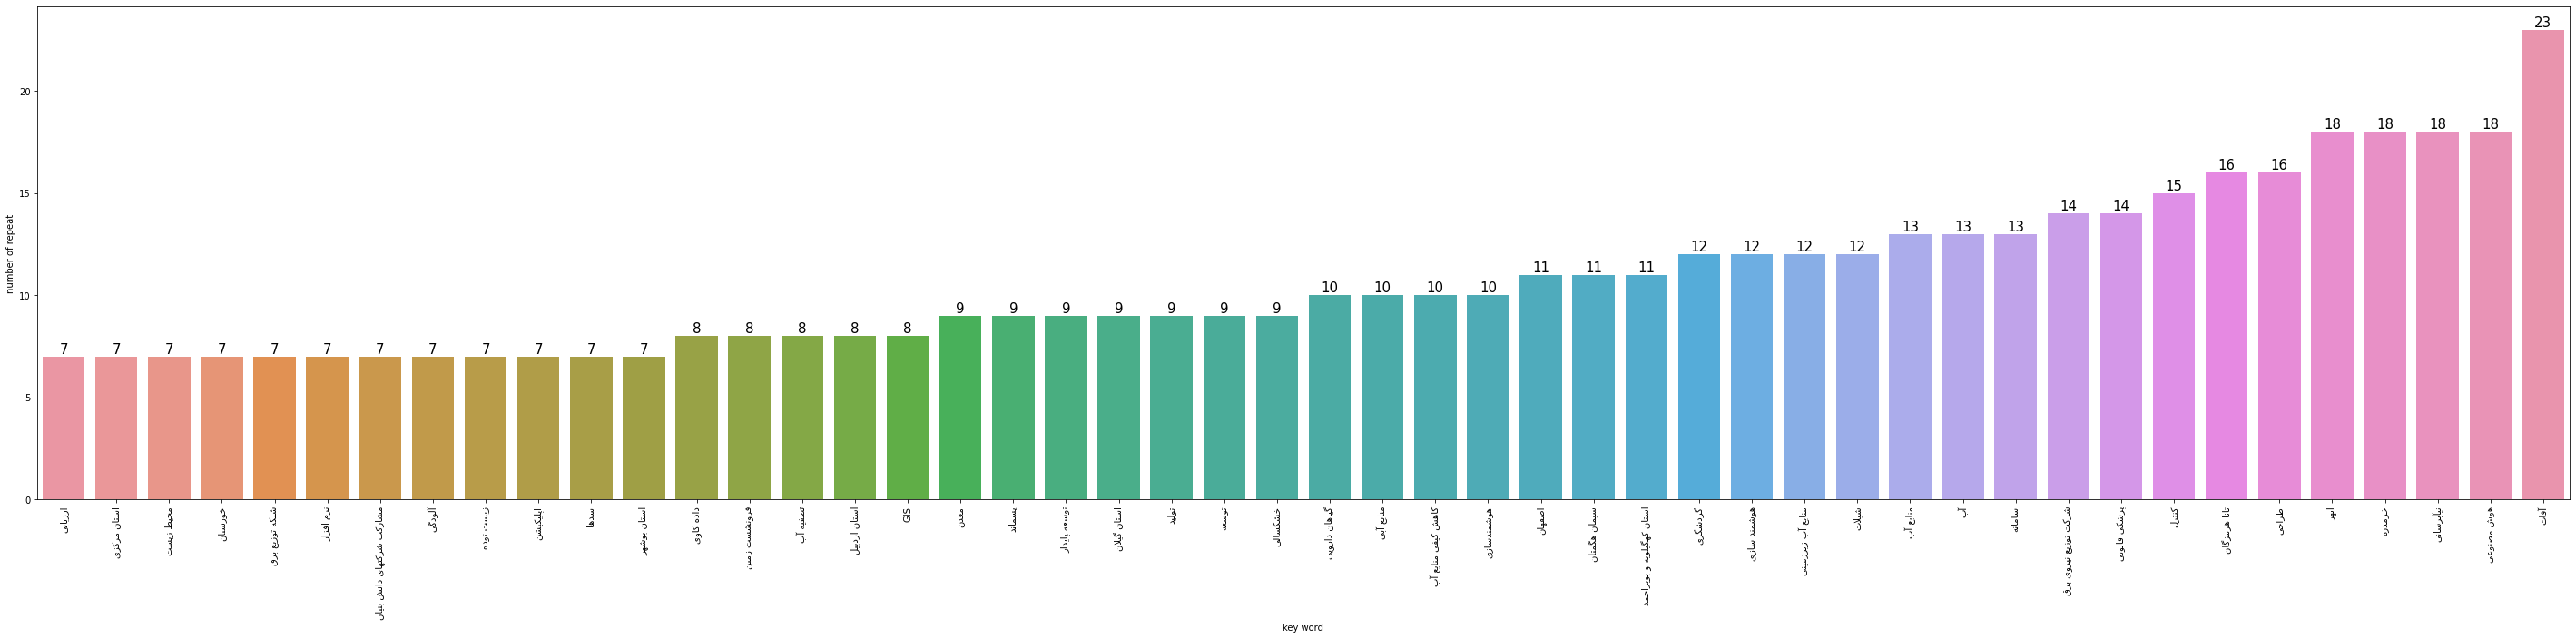

In [ ]:
temp = list(data["Key word"].dropna())

key = []
for element  in temp:
  element = element[2 : -2]
  key.extend(element.split("،"))

key = ["".join(element.lstrip()) for element in key]
key = ["".join(element.rstrip()) for element in key]




counter = {}
for element in set(key):
  counter.update({element : 0})

for element in (key):
  counter[element] += 1
counter = dict(sorted(counter.items(), key = lambda item : item[1]))
labels = list(counter.keys())[-50 : -2]
value = list(counter.values())[-50 : -2]
persian_labels = [get_display(reshape(label)) for label in labels]
df = pd.DataFrame({
    "key word" : persian_labels,
    "number of repeat" : value

})


plt.figure(figsize = (50 , 10))
plots = sns.barplot(x = "key word" , y = "number of repeat", data=df)
plots.set_xticklabels(plots.get_xticklabels(),rotation = 90)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.savefig("/content/drive/MyDrive/Ai labs/web scraping/plot/key_word.png")

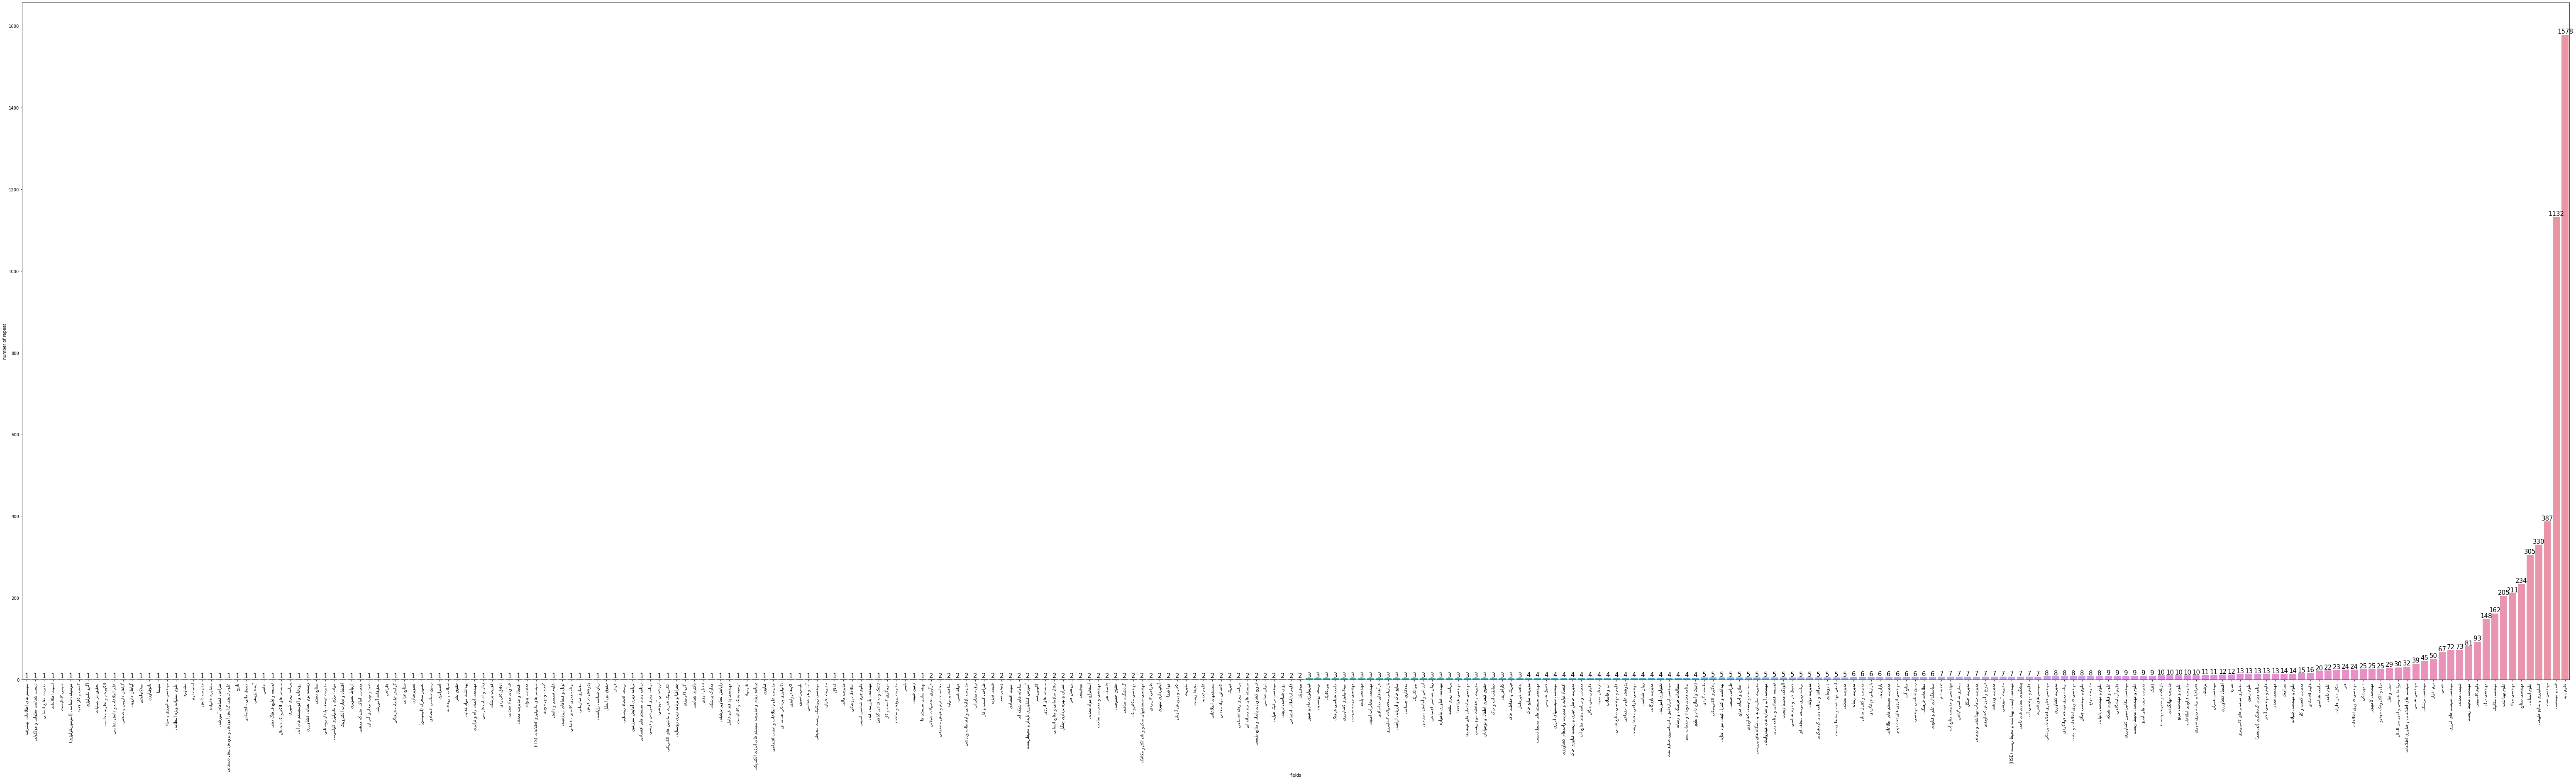

In [ ]:
field = list(data["field"].dropna())



fields = []

for element in list(field):
  fields.extend(element.split(","))

fields = ["".join(element.lstrip()) for element in fields]
fields = ["".join(element.rstrip()) for element in fields]


counter = {}
for element in set(fields):
  counter.update({element : 0})

for element in (fields):
  counter[element] += 1

counter = dict(sorted(counter.items(), key = lambda item:item[1]))
labels = list(counter.keys())
persian_labels = [get_display(reshape(label)) for label in labels]

df = pd.DataFrame({
    "fields" : persian_labels,
    "number of repeat" : list(counter.values())

})

plt.figure(figsize = (110 , 30))
plots = sns.barplot(x = "fields" , y = "number of repeat", data=df)
plots.set_xticklabels(plots.get_xticklabels(),rotation = 90)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.savefig("/content/drive/MyDrive/Ai labs/web scraping/plot/fields.png")

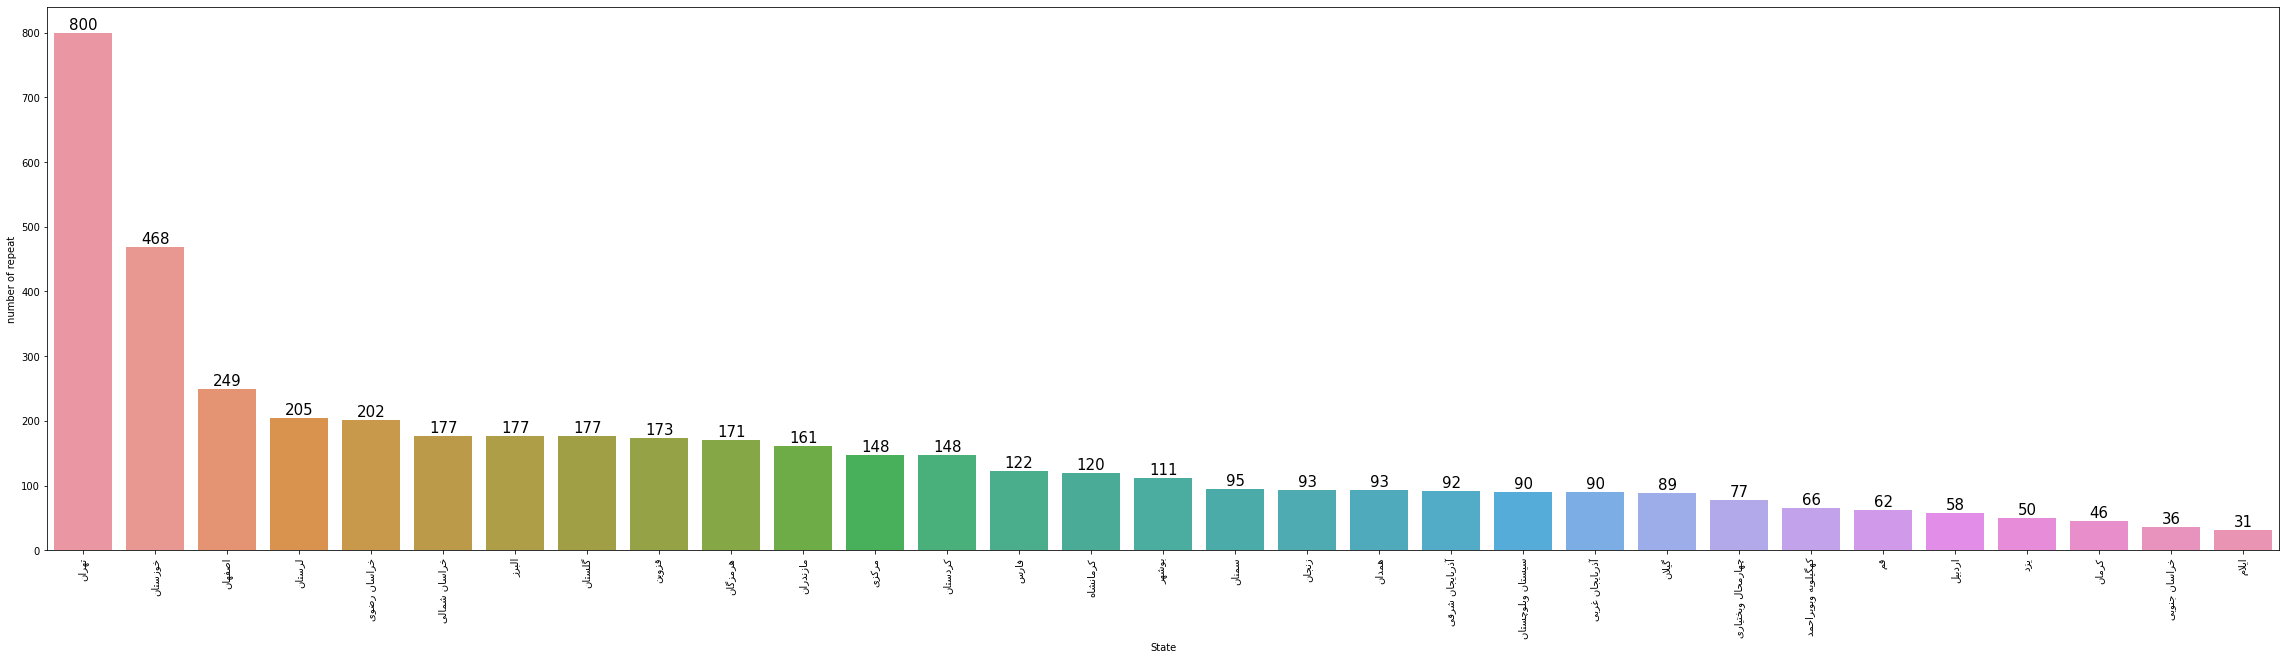

In [ ]:
State = dict(data["State"].value_counts())

labels = list(State.keys())
labels = [get_display(reshape(label)) for label in labels]
df = pd.DataFrame({
    "State" : labels,
    "number of repeat" : list(State.values())

})

plt.figure(figsize = (40 , 10))
plots = sns.barplot(x = "State" , y = "number of repeat", data=df)
plots.set_xticklabels(plots.get_xticklabels(),rotation = 90)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.savefig("/content/drive/MyDrive/Ai labs/web scraping/plot/State.png")

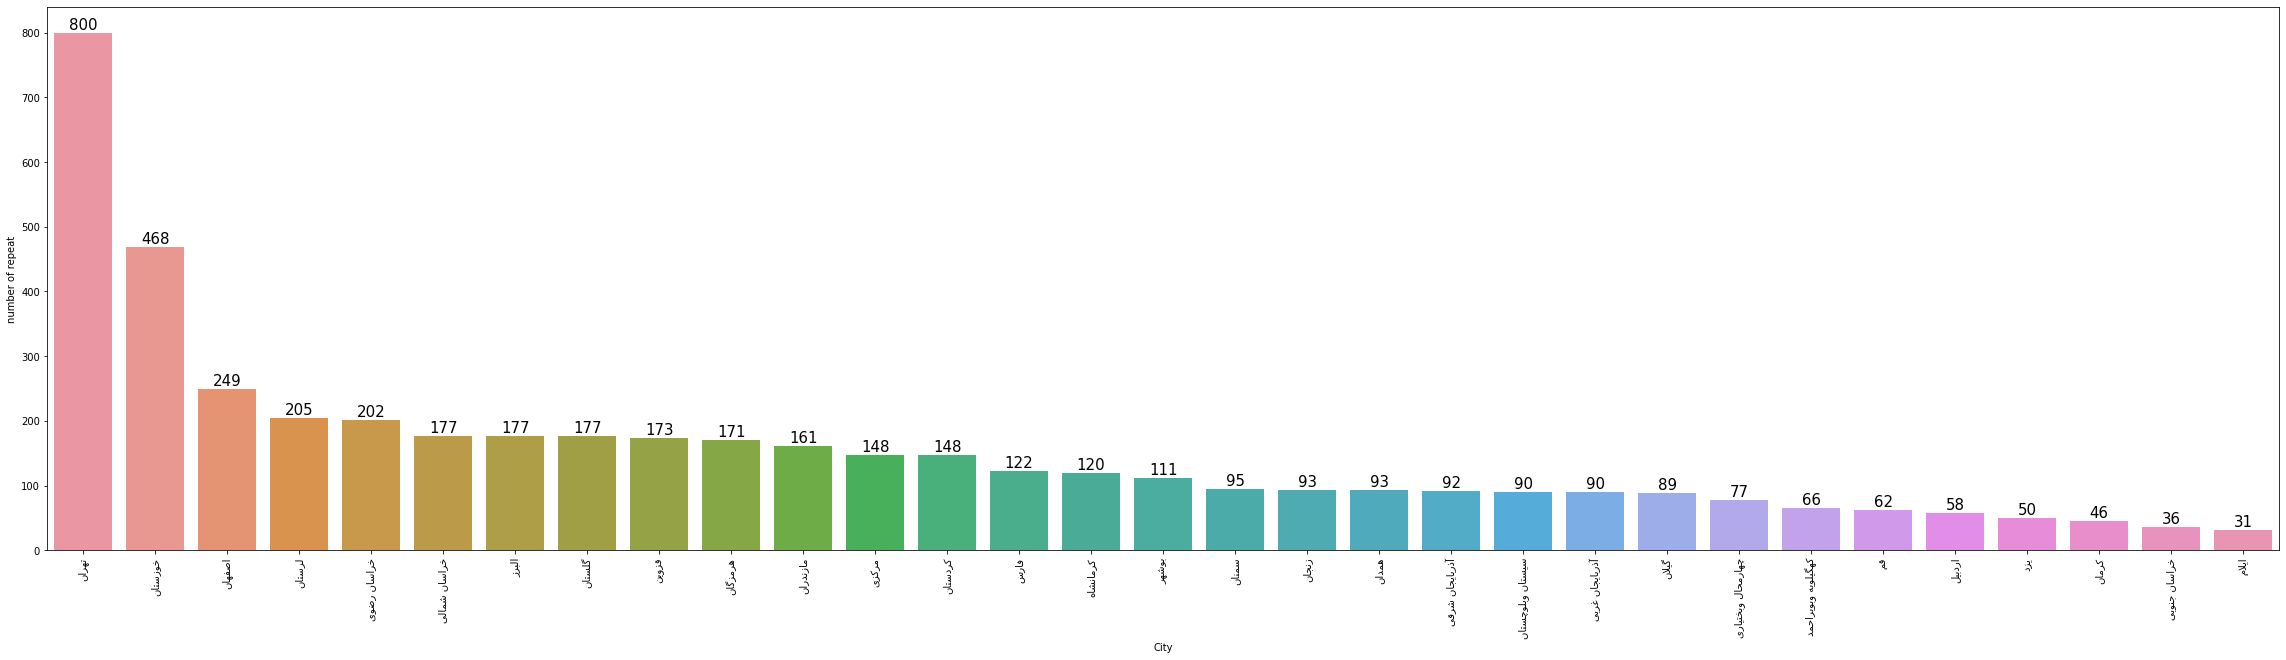

In [ ]:
City = dict(data["City"].value_counts())

labels = list(State.keys())
labels = [get_display(reshape(label)) for label in labels]
df = pd.DataFrame({
    "City" : labels,
    "number of repeat" : list(State.values())

})

plt.figure(figsize = (40 , 10))
plots = sns.barplot(x = "City" , y = "number of repeat", data=df)
plots.set_xticklabels(plots.get_xticklabels(),rotation = 90)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.savefig("/content/drive/MyDrive/Ai labs/web scraping/plot/City.png")

In [ ]:
!pip install wordcloud-fa
output.clear()

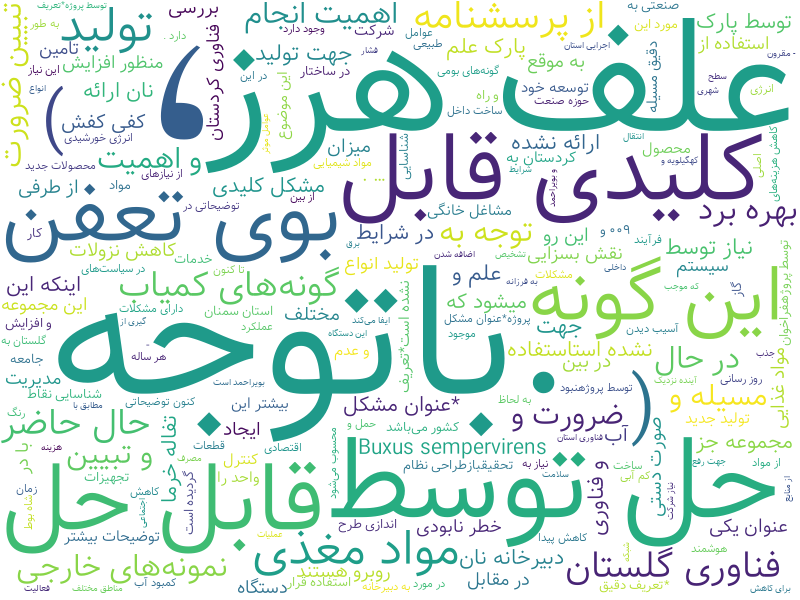

In [ ]:
from wordcloud_fa import WordCloudFa
abstract = list(data["Abstract"].dropna())
abstract = "".join(abstract)
wordcloud = WordCloudFa(persian_normalize=True, background_color='white', width=800, height=600, stopwords = hazm.stopwords_list())
wc = wordcloud.generate(abstract, )
image = wc.to_image()
image

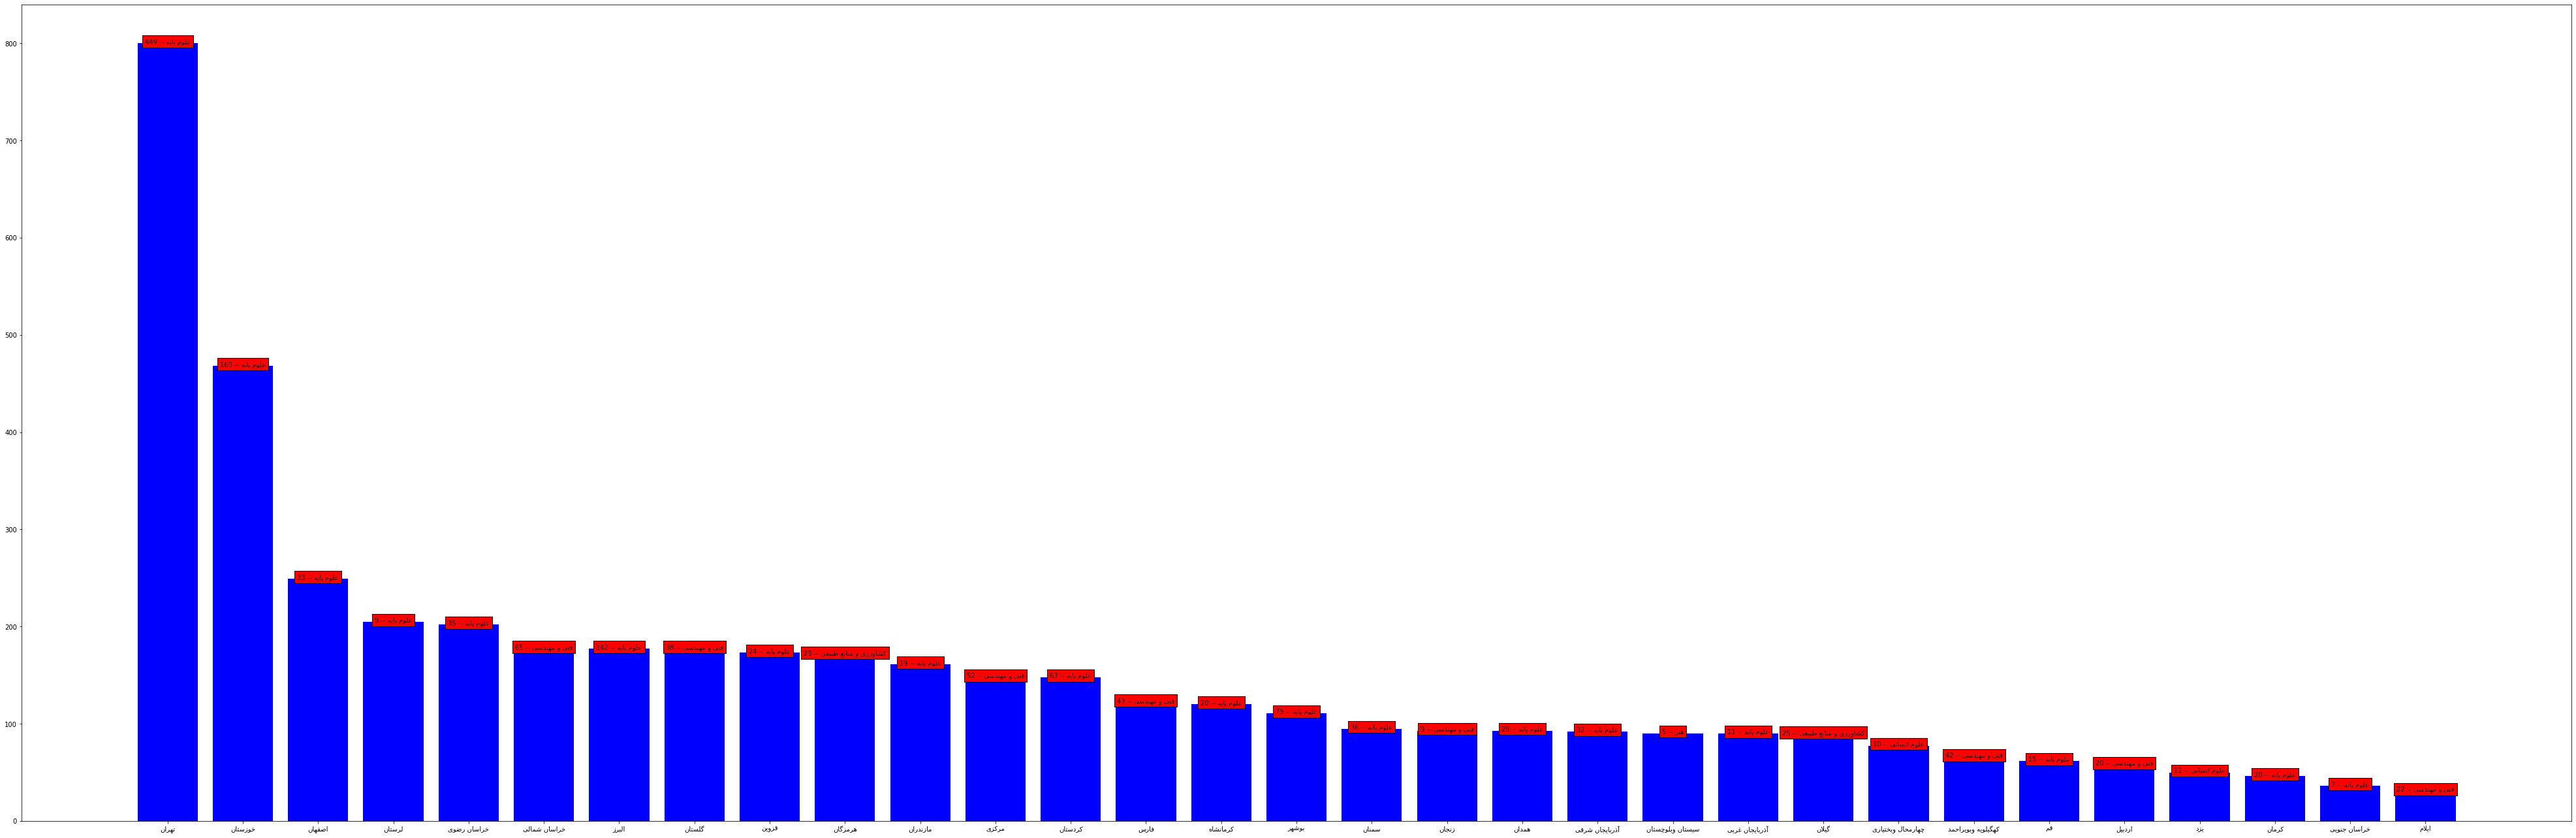

In [ ]:
groups = data.groupby(['State'])

counter = {}

for State in list(data["State"].dropna().unique()):
  temp_df = groups.get_group(State)
  temp_df = temp_df.reset_index()
  field = temp_df["field"].dropna()


  fields = []

  for element in list(field):
    fields.extend(element.split(","))

  fields = ["".join(element.lstrip()) for element in fields]
  fields = ["".join(element.rstrip()) for element in fields]
  
  temp_counter = {}
  for element in set(fields):
    temp_counter.update({element : 0})

  for element in fields:
    temp_counter[element] += 1
  temp_counter = dict(sorted(temp_counter.items(), key = lambda item : item[1]))
  counter.update({State : f"{list(temp_counter.keys())[-1]} -- {list(temp_counter.values())[-1]}"})


state = dict(data["State"].value_counts())

labels = list(state.keys())

df = pd.DataFrame({
    "State" : labels,
    "number of repeat" : list(state.values())

})

df["fildes"] = ""
for key, value in counter.items():
  for index in range(0, df.shape[0]):
    if key in df.loc[index]["State"] :
      df.loc.__setitem__((index, ("fildes")), value)

def addlabels(x ,y , labels):
    for i in range(len(x)):
        plt.text(x[i], y[i], labels[i], ha = 'center', bbox = dict(facecolor = 'red', alpha =1))
x = list(df["State"])
y = list(df["number of repeat"])
label = list(df["fildes"])

x = [get_display(reshape(element)) for element in x]
label = [get_display(reshape(element)) for element in label]
plt.figure(figsize = (70, 23))
plt.bar(x, y, color = "blue") 
plt    
addlabels(x, y, label)

